# Project 4:  Airbnb New User Bookings: Classification Analysis

### Muhammad Tahir @ Data Science Immersive at General Assembly

Welcome to Notebook in this Project 4 collection. In this notebook we’ll clean and explore the data in order to make intelligent choices in our feature selection process. The core of our work here is centered around the selected **problem statement:** Can we predict if someone is staying in the US or going abroad on thier AirBnB vacation?

## Par-1:  Imports and Data Extraction

## Imports

In [1]:
# Required Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import recall_score, precision_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## Data Extraction

In [2]:
# Reading data
df1 = pd.read_csv('train_users_my.csv')

df2 = pd.read_csv('countries.csv')

In [3]:
#merge above two data frames
df_m = pd.merge(left = df1,right = df2, on='country_destination')

In [4]:
df_m.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,signup_app,first_device_type,first_browser,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,Web,Windows Desktop,IE,US,36.966427,-95.84403,0.0,9826675.0,eng,0.0
1,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,Web,Mac Desktop,Chrome,US,36.966427,-95.84403,0.0,9826675.0,eng,0.0
2,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,...,Web,Mac Desktop,Chrome,US,36.966427,-95.84403,0.0,9826675.0,eng,0.0
3,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,...,Web,Mac Desktop,Safari,US,36.966427,-95.84403,0.0,9826675.0,eng,0.0
4,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,...,Web,Mac Desktop,Safari,US,36.966427,-95.84403,0.0,9826675.0,eng,0.0


In [5]:
df_m.shape

(78814, 22)

## Part-2: EDA

In [6]:
df_m['gender'] = df_m['gender'].map({'MALE': 0, 'FEMALE': 1, 'OTHER': 2, '-unknown-': 3})

In [7]:
df_m.shape

(78814, 22)

In [8]:
df_m.isnull().sum()

id                                   0
date_account_created                 0
timestamp_first_active               0
date_first_booking                   0
gender                               0
age                              17858
signup_method                        0
signup_flow                          0
language                             0
affiliate_channel                    0
affiliate_provider                   0
first_affiliate_tracked           1625
signup_app                           0
first_device_type                    0
first_browser                        0
country_destination                  0
lat_destination                      0
lng_destination                      0
distance_km                          0
destination_km2                      0
destination_language                 0
language_levenshtein_distance        0
dtype: int64

In [9]:
df_m.age.median()

33.0

In [10]:
df_m['age'] = df_m['age'].fillna(33)

In [11]:
df_m.isnull().sum()

id                                  0
date_account_created                0
timestamp_first_active              0
date_first_booking                  0
gender                              0
age                                 0
signup_method                       0
signup_flow                         0
language                            0
affiliate_channel                   0
affiliate_provider                  0
first_affiliate_tracked          1625
signup_app                          0
first_device_type                   0
first_browser                       0
country_destination                 0
lat_destination                     0
lng_destination                     0
distance_km                         0
destination_km2                     0
destination_language                0
language_levenshtein_distance       0
dtype: int64

In [12]:
df_m['first_affiliate_tracked'].fillna('', inplace = True)

In [13]:
df_m.isnull().sum()

id                               0
date_account_created             0
timestamp_first_active           0
date_first_booking               0
gender                           0
age                              0
signup_method                    0
signup_flow                      0
language                         0
affiliate_channel                0
affiliate_provider               0
first_affiliate_tracked          0
signup_app                       0
first_device_type                0
first_browser                    0
country_destination              0
lat_destination                  0
lng_destination                  0
distance_km                      0
destination_km2                  0
destination_language             0
language_levenshtein_distance    0
dtype: int64

In [14]:
df_m.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'lat_destination',
       'lng_destination', 'distance_km', 'destination_km2',
       'destination_language ', 'language_levenshtein_distance'],
      dtype='object')

<AxesSubplot:>

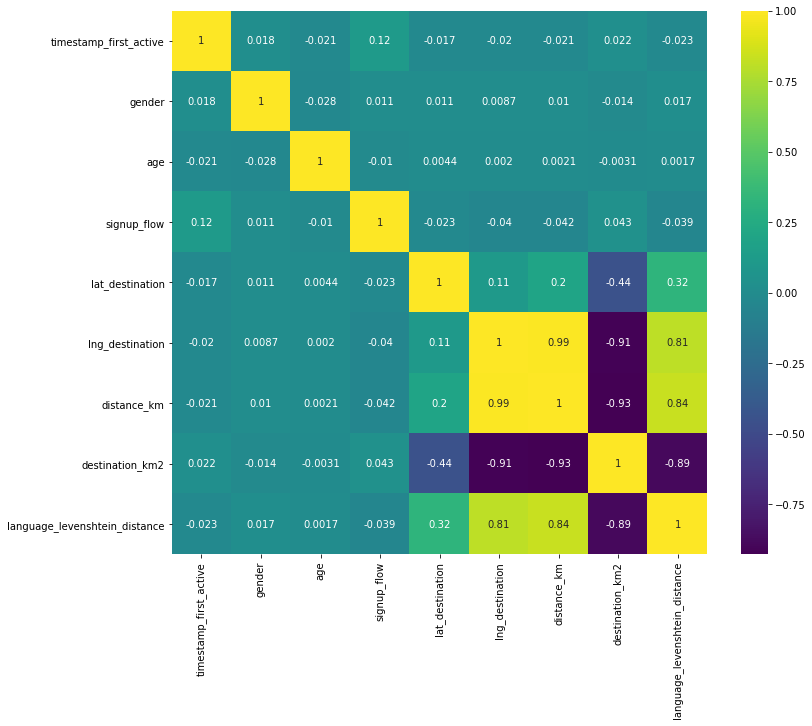

In [15]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_m.corr(), cmap = 'viridis', annot = True)

Text(0, 0.5, 'count')

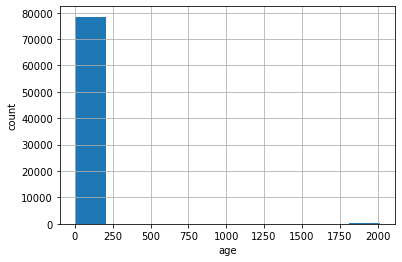

In [16]:
df_m['age'].hist()
plt.xlabel('age')
plt.ylabel('count')

In [17]:
df_m = df_m[df_m['age'] < 100]

Text(0, 0.5, 'count')

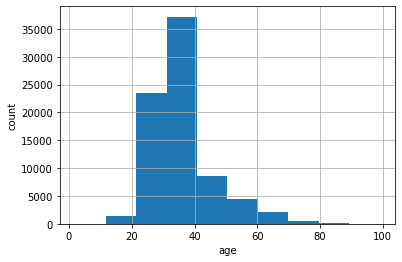

In [18]:
df_m['age'].hist()
plt.xlabel('age')
plt.ylabel('count')

/Users/tahir/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


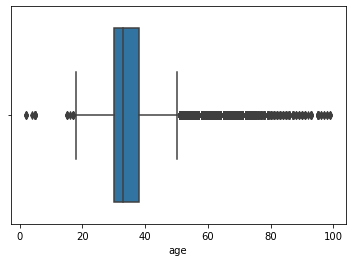

In [19]:
sns.boxplot(df_m['age']);

In [20]:
df_m['age'].describe()

count    77648.000000
mean        35.400139
std          9.882045
min          2.000000
25%         30.000000
50%         33.000000
75%         38.000000
max         99.000000
Name: age, dtype: float64

In [21]:
df_m.describe()

,timestamp_first_active,gender,age,signup_flow,lat_destination,lng_destination,distance_km,destination_km2,language_levenshtein_distance
count,7.764800e+04,77648.000000,77648.000000,77648.000000,77648.000000,77648.000000,77648.000000,7.764800e+04,77648.000000
mean,2.012976e+13,1.339764,35.400139,2.424390,38.707939,-76.091815,1579.945756,8.088531e+06,13.583739
std,9.843518e+09,1.220172,9.882045,6.467275,7.568111,42.172478,3215.178122,3.638825e+06,31.972729
min,2.009061e+13,0.000000,2.000000,0.000000,-26.853388,-96.818146,0.000000,4.154300e+04,0.000000
25%,2.012101e+13,0.000000,30.000000,0.000000,36.966427,-95.844030,0.000000,9.826675e+06,0.000000
50%,2.013080e+13,1.000000,33.000000,0.000000,36.966427,-95.844030,0.000000,9.826675e+06,0.000000
75%,2.014022e+13,3.000000,38.000000,0.000000,36.966427,-95.844030,0.000000,9.826675e+06,0.000000
max,2.014063e+13,3.000000,99.000000,25.000000,62.393303,133.275160,15297.744000,9.984670e+06,95.450000


<AxesSubplot:>

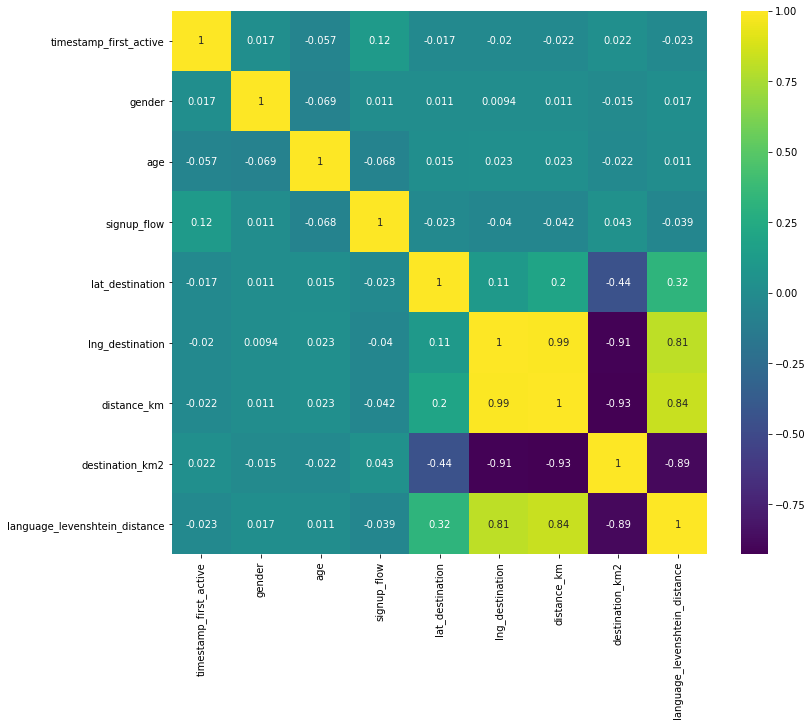

In [22]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_m.corr(), cmap = 'viridis', annot = True)

In [23]:
df_m.isnull().sum()

id                               0
date_account_created             0
timestamp_first_active           0
date_first_booking               0
gender                           0
age                              0
signup_method                    0
signup_flow                      0
language                         0
affiliate_channel                0
affiliate_provider               0
first_affiliate_tracked          0
signup_app                       0
first_device_type                0
first_browser                    0
country_destination              0
lat_destination                  0
lng_destination                  0
distance_km                      0
destination_km2                  0
destination_language             0
language_levenshtein_distance    0
dtype: int64

In [24]:
df_m['language'].value_counts()

en    75716
zh      440
fr      376
de      252
es      228
ko      180
it       97
ru       95
ja       72
pt       44
sv       37
nl       29
da       17
tr       16
no       12
pl       11
cs        7
fi        6
el        5
th        3
hu        2
ca        2
is        1
Name: language, dtype: int64

In [25]:
df_m.describe()

,timestamp_first_active,gender,age,signup_flow,lat_destination,lng_destination,distance_km,destination_km2,language_levenshtein_distance
count,7.764800e+04,77648.000000,77648.000000,77648.000000,77648.000000,77648.000000,77648.000000,7.764800e+04,77648.000000
mean,2.012976e+13,1.339764,35.400139,2.424390,38.707939,-76.091815,1579.945756,8.088531e+06,13.583739
std,9.843518e+09,1.220172,9.882045,6.467275,7.568111,42.172478,3215.178122,3.638825e+06,31.972729
min,2.009061e+13,0.000000,2.000000,0.000000,-26.853388,-96.818146,0.000000,4.154300e+04,0.000000
25%,2.012101e+13,0.000000,30.000000,0.000000,36.966427,-95.844030,0.000000,9.826675e+06,0.000000
50%,2.013080e+13,1.000000,33.000000,0.000000,36.966427,-95.844030,0.000000,9.826675e+06,0.000000
75%,2.014022e+13,3.000000,38.000000,0.000000,36.966427,-95.844030,0.000000,9.826675e+06,0.000000
max,2.014063e+13,3.000000,99.000000,25.000000,62.393303,133.275160,15297.744000,9.984670e+06,95.450000


In [26]:
df_m.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,signup_app,first_device_type,first_browser,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,1,56.0,basic,3,en,direct,...,Web,Windows Desktop,IE,US,36.966427,-95.84403,0.0,9826675.0,eng,0.0
1,87mebub9p4,2010-09-14,20091208061105,2010-02-18,3,41.0,basic,0,en,direct,...,Web,Mac Desktop,Chrome,US,36.966427,-95.84403,0.0,9826675.0,eng,0.0
2,osr2jwljor,2010-01-01,20100101215619,2010-01-02,3,33.0,basic,0,en,other,...,Web,Mac Desktop,Chrome,US,36.966427,-95.84403,0.0,9826675.0,eng,0.0
3,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,1,46.0,basic,0,en,other,...,Web,Mac Desktop,Safari,US,36.966427,-95.84403,0.0,9826675.0,eng,0.0
4,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,1,47.0,basic,0,en,direct,...,Web,Mac Desktop,Safari,US,36.966427,-95.84403,0.0,9826675.0,eng,0.0


In [27]:
df_m.shape

(77648, 22)

In [28]:
df_m.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'lat_destination',
       'lng_destination', 'distance_km', 'destination_km2',
       'destination_language ', 'language_levenshtein_distance'],
      dtype='object')

In [29]:
feature_list = ['id', 'age', 'gender', 'signup_method', 'affiliate_provider', 'distance_km', 'country_destination', 'destination_km2', 'destination_language ', 'language_levenshtein_distance']

In [30]:
df_mf = df_m[feature_list]

In [31]:
df_mf.head()

,id,age,gender,signup_method,affiliate_provider,distance_km,country_destination,destination_km2,destination_language,language_levenshtein_distance
0,4ft3gnwmtx,56.0,1,basic,direct,0.0,US,9826675.0,eng,0.0
1,87mebub9p4,41.0,3,basic,direct,0.0,US,9826675.0,eng,0.0
2,osr2jwljor,33.0,3,basic,other,0.0,US,9826675.0,eng,0.0
3,lsw9q7uk0j,46.0,1,basic,craigslist,0.0,US,9826675.0,eng,0.0
4,0d01nltbrs,47.0,1,basic,direct,0.0,US,9826675.0,eng,0.0


In [32]:
df_mf.shape

(77648, 10)

Text(0, 0.5, 'count')

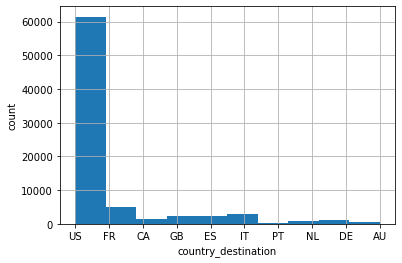

In [33]:
df_mf['country_destination'].hist()
plt.xlabel('country_destination')
plt.ylabel('count')

## Part-3: Feature Engineering

#### Binary US==1 and others 0

Decided to binarize US v. Other countries given the distribution of destination exhibited in the histogram of country_destination in the EDA portion of Notebook.

In [34]:
df_mf = df_m[feature_list].copy()

In [35]:
df_mf

,id,age,gender,signup_method,affiliate_provider,distance_km,country_destination,destination_km2,destination_language,language_levenshtein_distance
0,4ft3gnwmtx,56.0,1,basic,direct,0.000,US,9826675.0,eng,0.0
1,87mebub9p4,41.0,3,basic,direct,0.000,US,9826675.0,eng,0.0
2,osr2jwljor,33.0,3,basic,other,0.000,US,9826675.0,eng,0.0
3,lsw9q7uk0j,46.0,1,basic,craigslist,0.000,US,9826675.0,eng,0.0
4,0d01nltbrs,47.0,1,basic,direct,0.000,US,9826675.0,eng,0.0
...,...,...,...,...,...,...,...,...,...,...
78809,egikxlfmh8,32.0,1,basic,google,15297.744,AU,7741220.0,eng,0.0
78810,oitccptcw6,48.0,0,basic,google,15297.744,AU,7741220.0,eng,0.0
78811,86s1bo34bg,40.0,1,facebook,google,15297.744,AU,7741220.0,eng,0.0
78812,ms2453k9vj,63.0,1,basic,google,15297.744,AU,7741220.0,eng,0.0


In [36]:
df_mf['country_destination'] = df_mf['country_destination'].map(
    {'AU': 0, 'CA': 0, 'DE': 0, 'ES': 0,
     'FR': 0, 'GB': 0, 'IT': 0, 'NL': 0,
    'PT': 0, 'US': 1})

In [37]:
df_mf.shape

(77648, 10)

In [38]:
df_mf['country_destination'].value_counts()

1    61442
0    16206
Name: country_destination, dtype: int64

### dumify all non-numeric columns

In [39]:
dummy_list = ['gender', 'signup_method', 'affiliate_provider', 'destination_language ']

In [40]:
df_mfd = pd.get_dummies(df_mf, columns=dummy_list
                        , drop_first = True)

In [41]:
df_mfd.shape

(77648, 32)

## Part-4: Model-1 Logestic Regression

In [42]:
# Define features X and target y
X = df_mfd.drop(columns=['country_destination', 'id'])
y = df_mfd['country_destination']

# Train test split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate and fit model
logr = LogisticRegression(solver='liblinear')
logr.fit(X_train, y_train)

# Get our scores
print('Cross val score:', cross_val_score(logr, X_train, y_train, cv=5).mean())
print('Training score:', logr.score(X_train, y_train))
print('Testing score:', logr.score(X_test, y_test))

Cross val score: 0.9817638612192736
Training score: 0.981763857407789
Testing score: 0.9822790026787555


In [43]:
from sklearn.metrics import recall_score, precision_score

preds = logr.predict(X)
print('accuray:', logr.score(X, y))
print('recall:', recall_score(y, preds))
print('precision:', precision_score(y, preds))

accuray: 0.9818926437255306
recall: 1.0
precision: 0.9776285641547862


In [44]:
y_train.value_counts(normalize=True)

1    0.790559
0    0.209441
Name: country_destination, dtype: float64

In [45]:
y_test.value_counts(normalize=True)

1    0.793478
0    0.206522
Name: country_destination, dtype: float64

In [46]:
# creating new data frame

y_preds_test = logr.predict(X_test)

cm = confusion_matrix(y_test, y_preds_test)
tn, fp, fn, tp = cm.ravel()

df_pred = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

In [47]:
df_pred

,Predicted 0,Predicted 1
Actual 0,3665,344
Actual 1,0,15403


As we can see there is little evidence of overfitting with a train test score of roughly .98/.98 and strong accuracy overall. This significantly beats the baseline accuracy of .79 and does well overall.
If we could highlight one downfall it is that it has a number of false negatives (although no false positives in this case). So depending on preference for sensitivity v. specificity this would need to be considered.
However, it is not as strong as the random forest model, demonstrated in model 2 below.

### Model-2 Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
# Define features X and target y
X = df_mfd.drop(columns=['country_destination', 'id'])
y = df_mfd['country_destination']

In [51]:
# Train test split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [52]:
# Instantiate and fit model
rf = RandomForestClassifier()
rf.fit(Z_train, y_train)

RandomForestClassifier()

In [53]:
# Get our scores
print('Cross val score:', cross_val_score(logr, Z_train, y_train, cv=5).mean())
print('Training score:', rf.score(Z_train, y_train))
print('Testing score:', rf.score(Z_test, y_test))
from sklearn.metrics import recall_score, precision_score
rf_preds = rf.predict(X)
print('accuracy:', rf.score(X, y))
print('recall:', recall_score(y, rf_preds))
print('precision:', precision_score(y, rf_preds))
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)
from sklearn.metrics import confusion_matrix

Cross val score: 1.0
Training score: 1.0
Testing score: 1.0
accuracy: 0.20871110653204203
recall: 0.0
precision: 0.0


/Users/tahir/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# creating new data frame
rf_preds_test = rf.predict(Z_test)
cm = confusion_matrix(y_test, rf_preds_test)
tn, fp, fn, tp = cm.ravel()
df_pred_2 = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
df_pred_2

,Predicted 0,Predicted 1
Actual 0,4009,0
Actual 1,0,15403


As we can see there is again, little evidence of overfitting with a train test score of 1/1 aka perfect accuracy overall. This significantly beats the baseline accuracy of .79.
Not a lot of downfalls of this model given the high accuracy. And given the fit and accuracy, this is selected as our production model.

## Summary and Conclusion

Over the course of this project we have cleaned, performed eda and preprocessing and finally modeled on data from AirBnB with the intention to address the project statement: Can we correctly classify whether users are going abroad or staying in the US.

In the end we chose our features given what we know about the travel industry and demographic choices for travel. Namely - age is likely to be a large factor in where people travel, and language can be a large barrier to going abroad (hence the inclusion of language and language difference (levenshtein distance) . Equally, given hassle, airline costs, jet lag etc. distance was likely to be a factor and in fact not a linear factor - hence the inclusion of the squared destination distance.

In conclusion, the Random Forest model is undoubtedly the best model given the perfect accuracy on train/test and no overfitting. The random forest model appears to work so well here potentially because of it’s internal mechanism for aggregating decision tress from multiple bootstrapped samples in such a way that it decorrelates each model. This helps to control for variance which is one potential explanation for why we do not see much overfitting in the model. However, with random forest models, this decorrelative function usually comes at the cost of some bias so to see accuracy levels at 100% is perhaps a surprising, but welcome, result.

## Outlook

With additional time we would look into further features, spend more time understanding and cleaning the session dataframe for inclusion atleast in EDA and perhaps include the NDF results as a classifier. This could allow us to make predictions as to why certain groups did not select a destination.